# Projeto da disciplina de Modelagem Preditiva e Descritiva I - UFPE

Tadao Ando Junior (tjunior@atech.com.br)

## Preparação do ambiente

In [1]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os.path

# Carga do arquivo no formato arff
from scipy.io.arff import loadarff 

# Préprocessamento de atributos categóricos
from sklearn.preprocessing import OneHotEncoder

# Seleção de test/train sets
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import StratifiedKFold

# Busca exaustiva por parametros em ranges especificados
from sklearn.model_selection import GridSearchCV

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score, f1_score, recall_score, confusion_matrix
from yellowbrick.classifier import ROCAUC

# Visualização
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define tamanho padrão dos plotes
# Aparentemente para a configuração ser efetivada no Jupyter eu preciso plotar uma figura qualquer primeiro
plt.plot([0])
plt.close()
plt.rcParams['figure.figsize'] = [16, 16]
sns.set(rc={'figure.figsize':(16,16)})

## Carga do banco de dados

In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Verifica se estamos rodando dentro do GoogleCollab
if IN_COLAB:
        print('Loading dataset from github tadj8/mpd')
        dataset_name = 'collins.arff'

        # Se o arquivo já foi baixado não é necessário baixar novamente
        if not os.path.isfile(dataset_name):
                urllib.request.urlretrieve("https://raw.githubusercontent.com/tadj8/mpd/main/datasets/collins.arff", dataset_name)
        raw_data = loadarff("collins.arff")
else:
        print('Reading dataset from local file')
        raw_data = loadarff("datasets/collins.arff")

# Converte dados brutos para um dataframe pandas
df_orig = pd.DataFrame(raw_data[0])

Reading dataset from local file


In [4]:
df_orig

,Text,FirstPerson,InnerThinking,ThinkPositive,ThinkNegative,ThinkAhead,ThinkBack,Reasoning,Share_SocTies,Direct_Activity,...,SpaceInterval,Motion,PastEvents,TimeInterval,ShiftingEvents,Text_Coverage,Genre,Counter,Corpus,Corp.Genre
0,b'A01.TXT',0.09,1.72,0.62,0.70,2.15,0.66,1.23,2.24,0.48,...,0.75,0.35,2.55,1.63,0.79,28.31,b'1',1.0,b'1',b'101'
1,b'A02.TXT',0.13,1.48,0.38,0.63,1.85,0.93,1.48,2.28,0.21,...,0.59,0.25,1.77,1.39,0.80,23.91,b'1',2.0,b'1',b'101'
2,b'A03.TXT',0.04,1.72,0.34,1.12,1.55,0.90,1.68,2.84,0.17,...,0.65,0.17,2.32,1.94,0.82,30.15,b'1',3.0,b'1',b'101'
3,b'A04.TXT',0.00,2.74,0.90,2.43,1.21,1.03,3.46,3.06,0.22,...,0.67,0.09,1.89,1.71,0.81,29.43,b'1',4.0,b'1',b'101'
4,b'A05.TXT',0.26,2.15,0.39,0.61,2.28,0.75,1.93,1.84,0.44,...,0.75,0.35,1.54,1.80,0.96,27.89,b'1',5.0,b'1',b'101'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'rFR5.txt',0.49,3.25,0.41,2.10,1.07,0.25,3.29,1.93,1.65,...,0.70,0.90,1.19,1.77,1.07,34.11,b'15',996.0,b'2',b'215'
996,b'rFR6.txt',5.17,4.86,1.08,0.99,1.26,0.45,3.51,1.17,0.00,...,1.26,0.18,1.35,1.08,1.26,38.95,b'15',997.0,b'2',b'215'
997,b'rFR7.txt',0.00,2.70,1.30,1.21,1.21,1.30,2.16,1.35,0.18,...,1.08,0.31,5.13,1.71,1.08,40.36,b'15',998.0,b'2',b'215'
998,b'rFR8.txt',0.73,1.96,0.41,0.37,1.06,0.65,2.04,0.86,0.08,...,3.02,1.02,4.41,0.61,0.41,42.53,b'15',999.0,b'2',b'215'


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Text             1000 non-null   object 
 1   FirstPerson      1000 non-null   float64
 2   InnerThinking    1000 non-null   float64
 3   ThinkPositive    1000 non-null   float64
 4   ThinkNegative    1000 non-null   float64
 5   ThinkAhead       1000 non-null   float64
 6   ThinkBack        1000 non-null   float64
 7   Reasoning        1000 non-null   float64
 8   Share_SocTies    1000 non-null   float64
 9   Direct_Activity  1000 non-null   float64
 10  Interacting      1000 non-null   float64
 11  Notifying        1000 non-null   float64
 12  LinearGuidance   1000 non-null   float64
 13  WordPicture      1000 non-null   float64
 14  SpaceInterval    1000 non-null   float64
 15  Motion           1000 non-null   float64
 16  PastEvents       1000 non-null   float64
 17  TimeInterval   

### Preparação e análise do dataset

In [6]:
df = df_orig.copy()
# df = df_orig.loc[df_orig['Corpus'] == b'2'] 

# Nosso target:
#    Corp.Genre : Combinação do Gênero (atribuído pelos compiladores do corpora) e corpus (1=Brown e 2=Frown)

# A combinação de corpus e gênero é categórica. Transformo em ordinal aqui para ser tratável em modelos
# que não aceitam categóricas
df['Corp.Genre'] = df['Corp.Genre'].factorize()[0]

# Remove colunas que não utilizaremos:
#   Genre / Corpus : As duas colunas juntas são o target e já estão combinadas em Corp.Genre, portanto podem ser removidas
#   Text : nome do texto de origem
#   Counter : contador simples
#
df.drop(['Text', 'Corpus', 'Counter', 'Genre'], axis=1, inplace=True)

In [7]:
df

,FirstPerson,InnerThinking,ThinkPositive,ThinkNegative,ThinkAhead,ThinkBack,Reasoning,Share_SocTies,Direct_Activity,Interacting,Notifying,LinearGuidance,WordPicture,SpaceInterval,Motion,PastEvents,TimeInterval,ShiftingEvents,Text_Coverage,Corp.Genre
0,0.09,1.72,0.62,0.70,2.15,0.66,1.23,2.24,0.48,0.00,2.11,5.23,5.01,0.75,0.35,2.55,1.63,0.79,28.31,0
1,0.13,1.48,0.38,0.63,1.85,0.93,1.48,2.28,0.21,0.17,1.77,3.46,4.34,0.59,0.25,1.77,1.39,0.80,23.91,0
2,0.04,1.72,0.34,1.12,1.55,0.90,1.68,2.84,0.17,0.17,2.84,5.03,5.85,0.65,0.17,2.32,1.94,0.82,30.15,0
3,0.00,2.74,0.90,2.43,1.21,1.03,3.46,3.06,0.22,0.31,2.47,3.15,3.28,0.67,0.09,1.89,1.71,0.81,29.43,0
4,0.26,2.15,0.39,0.61,2.28,0.75,1.93,1.84,0.44,0.35,2.54,5.79,3.16,0.75,0.35,1.54,1.80,0.96,27.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.49,3.25,0.41,2.10,1.07,0.25,3.29,1.93,1.65,2.39,3.17,4.28,4.20,0.70,0.90,1.19,1.77,1.07,34.11,29
996,5.17,4.86,1.08,0.99,1.26,0.45,3.51,1.17,0.00,0.58,2.92,4.72,7.11,1.26,0.18,1.35,1.08,1.26,38.95,29
997,0.00,2.70,1.30,1.21,1.21,1.30,2.16,1.35,0.18,0.04,2.25,10.61,6.74,1.08,0.31,5.13,1.71,1.08,40.36,29
998,0.73,1.96,0.41,0.37,1.06,0.65,2.04,0.86,0.08,1.18,1.47,11.23,11.02,3.02,1.02,4.41,0.61,0.41,42.53,29


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:19])
df_scaled = scaler.transform(df.iloc[:,0:19])

In [9]:
# Cria um dicionario com o mapeamento entre os valores originais e os fatorizados e vice-versa para consulta posterior
orig_to_ordinal={}
ordinal_to_orig={}
keys=list(df_orig['Corp.Genre'].unique())

for i in range(0,30):
        orig_to_ordinal[keys[i]] = i
        ordinal_to_orig[i]=keys[i]

In [10]:
# Identificando valores ordenados pela frequencia
df['Corp.Genre'].value_counts().sort_values()

26     6
11     6
29     9
14     9
17    17
18    17
3     17
2     17
10    24
25    24
16    27
1     27
13    29
24    29
9     29
27    29
12    29
28    29
7     30
22    30
4     36
19    36
15    44
0     44
5     48
20    48
6     75
21    75
23    80
8     80
Name: Corp.Genre, dtype: int64

In [11]:
# Para tentar remover alguma classe
# df.drop(df[df['Corp.Genre'] == 11].index, axis=0, inplace=True)
# df.drop(df[df['Corp.Genre'] == 14].index, axis=0, inplace=True)

In [12]:
# Gera profile do dataset com pandas_profiling (não consegui rodar isso no google collab, somente localmente)
# O relatório pode ser visto com um browser

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file('report_corpus.html')

## Experimentos

In [13]:
import functools

# Função de análise usando kfold + gridsearch
def grid_search(skf, model, parameters, X, y):
      # Listas para armazenar métricas em cada fold
      accuracies_list = []
      f1score_list = []
      recall_list = []
      cm_list = []

      # Armazena melhor fold
      y_pred_best = {}
      y_test_best = {}

      fold = 0

      for train, test in skf.split(X, y):
            X_train, X_test = X.iloc[train], X.iloc[test]
            y_train, y_test = y.iloc[train], y.iloc[test]
    
            # Busca por combinação exaustiva dos hiperparâmetros (gridsearch)
            grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 5,
                    n_jobs = -1)
        
            grid.fit(X_train, y_train)

            y_pred = grid.predict(X_test)
    
            # print('.', end='')
            print("Best params:", grid.best_params_)         
            
            accuracies_list.append(accuracy_score(y_test, y_pred))
            f1score_list.append(f1_score(y_test, y_pred, average='weighted'))
            recall_list.append(recall_score(y_test, y_pred, average='weighted'))
            cm_list.append(confusion_matrix(y_test, y_pred, labels=df['Corp.Genre'].unique()))

            fold += 1

      accuracies = np.array(accuracies_list)
      f1score = np.array(f1score_list)
      recall = np.array(recall_list)

      # Calcula confusion matrix média
      cm_mean = functools.reduce(lambda a,b: a+b, cm_list) / len(cm_list)

      # Calcula stdev das confusion matrices (element-wise)
      partial = np.copy(cm_list[0])
      partial.fill(0)
      for i in cm_list:
            partial = partial + pow(i - cm_mean,2)

      partial = partial / len(cm_list)
      cm_std = pow(partial, 0.5)

      print("")
      print("Precision   : %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
      print("F1-score    : %.3f +- (%.3f)" %(f1score.mean(), f1score.std()))
      print("Recall      : %.3f +- (%.3f)" %(recall.mean(), recall.std()))
      print("Best params : %s" % (grid.best_params_))

      grid.best_index_

      # Desenha confusion matrix usando heatmap
      sns.heatmap(cm_mean, annot=True, annot_kws={"size": 12}, cmap="gray_r" )
      plt.xlabel("Predicted Label")
      plt.ylabel("True Label")
      plt.title("Matriz de confusão : média")
      plt.show()

      sns.heatmap(cm_std, annot=True, annot_kws={"size": 12}, cmap="gray_r" )
      plt.xlabel("Predicted Label")
      plt.ylabel("True Label")
      plt.title("Predicted Label : desvio padrão")
      plt.show()

      return pd.DataFrame(grid.cv_results_)


In [14]:
# Define semente padrão para geradores de números pseudo-aleatórios
default_seed = 2022

In [15]:
# Esse holdout não é usado na estimativa dos hiperparâmetros. Ele é usado para comparar
# as curvas ROC dos melhores classificadores de cada método com o mesmo conjunto de teste

# Seleção de atributos
X = pd.DataFrame(df_scaled[:,0:19])
y = df.iloc[:,19]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=default_seed)

### kNN

Best params: {'n_neighbors': 25, 'weights': 'distance'}
Best params: {'n_neighbors': 25, 'weights': 'distance'}
Best params: {'n_neighbors': 25, 'weights': 'uniform'}
Best params: {'n_neighbors': 25, 'weights': 'distance'}
Best params: {'n_neighbors': 40, 'weights': 'distance'}
Best params: {'n_neighbors': 25, 'weights': 'distance'}
Best params: {'n_neighbors': 40, 'weights': 'distance'}
Best params: {'n_neighbors': 40, 'weights': 'distance'}
Best params: {'n_neighbors': 30, 'weights': 'distance'}
Best params: {'n_neighbors': 40, 'weights': 'distance'}

Precision   : 0.248 +- (0.035)
F1-score    : 0.215 +- (0.033)
Recall      : 0.248 +- (0.035)
Best params : {'n_neighbors': 40, 'weights': 'distance'}


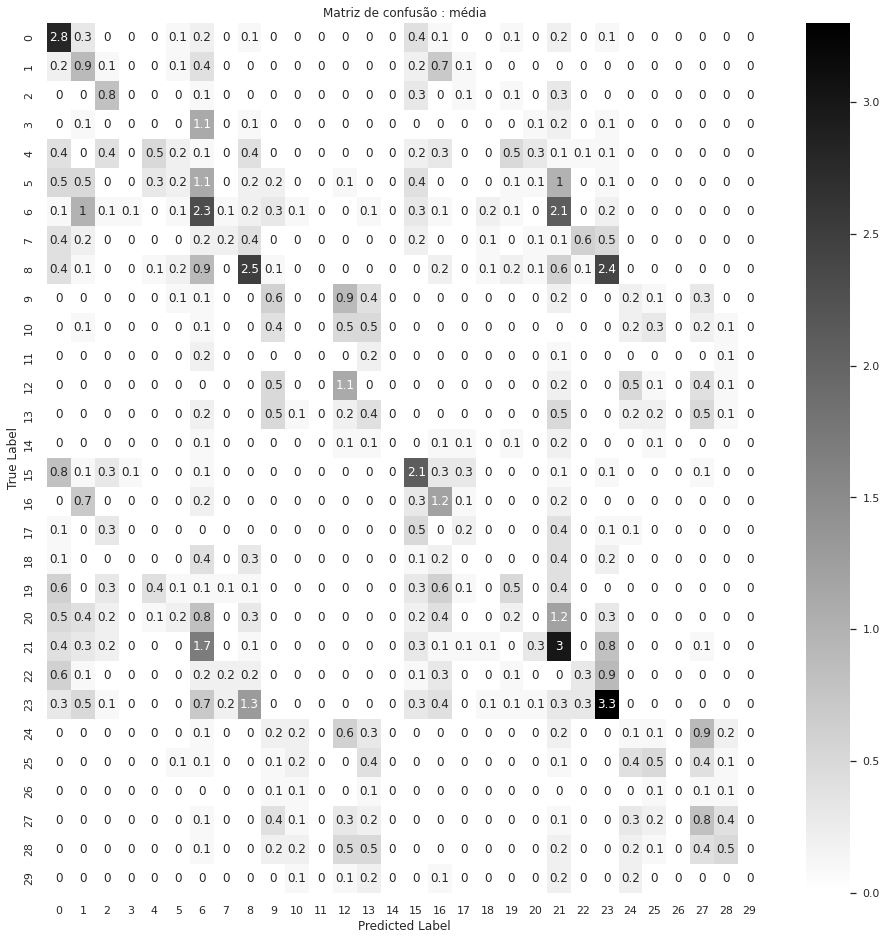

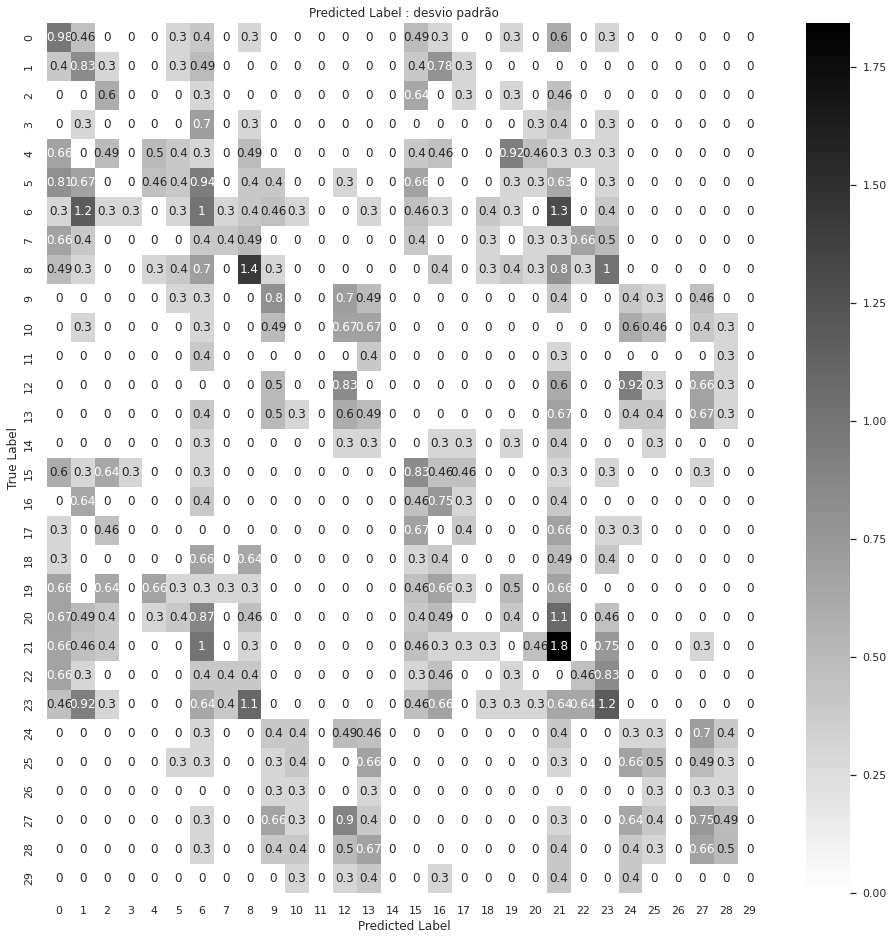

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002161,0.000224,0.009909,0.001788,25,uniform,"{'n_neighbors': 25, 'weights': 'uniform'}",0.272222,0.238889,0.283333,0.188889,0.177778,0.232222,0.042659,2
1,0.002229,0.000269,0.006625,0.001456,25,distance,"{'n_neighbors': 25, 'weights': 'distance'}",0.272222,0.227778,0.266667,0.205556,0.172222,0.228889,0.037581,3
2,0.003497,0.001197,0.009907,0.000622,30,uniform,"{'n_neighbors': 30, 'weights': 'uniform'}",0.244444,0.238889,0.250000,0.177778,0.188889,0.220000,0.030348,6
3,0.002843,0.000468,0.006300,0.000544,30,distance,"{'n_neighbors': 30, 'weights': 'distance'}",0.255556,0.238889,0.261111,0.183333,0.183333,0.224444,0.034355,5
4,0.002369,0.000092,0.011635,0.001788,40,uniform,"{'n_neighbors': 40, 'weights': 'uniform'}",0.233333,0.211111,0.266667,0.222222,0.194444,0.225556,0.024242,4
5,0.002642,0.000640,0.006410,0.000888,40,distance,"{'n_neighbors': 40, 'weights': 'distance'}",0.261111,0.205556,0.294444,0.216667,0.211111,0.237778,0.034498,1


In [16]:
# cross validation + gridsearch
parameters = { 'n_neighbors' : [25, 30, 40],
               'weights': ['uniform', 'distance']
        }
grid_search(StratifiedKFold(n_splits=10, random_state=default_seed, shuffle=True), KNeighborsClassifier(), parameters, X, y)

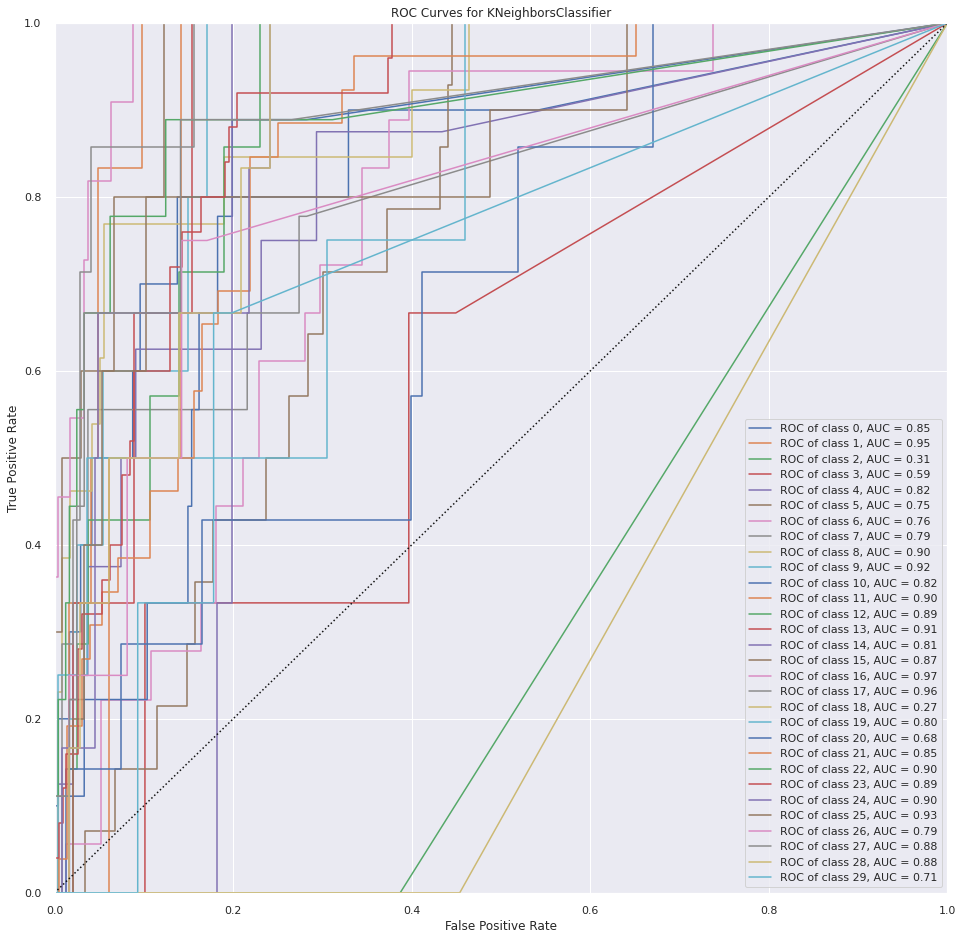

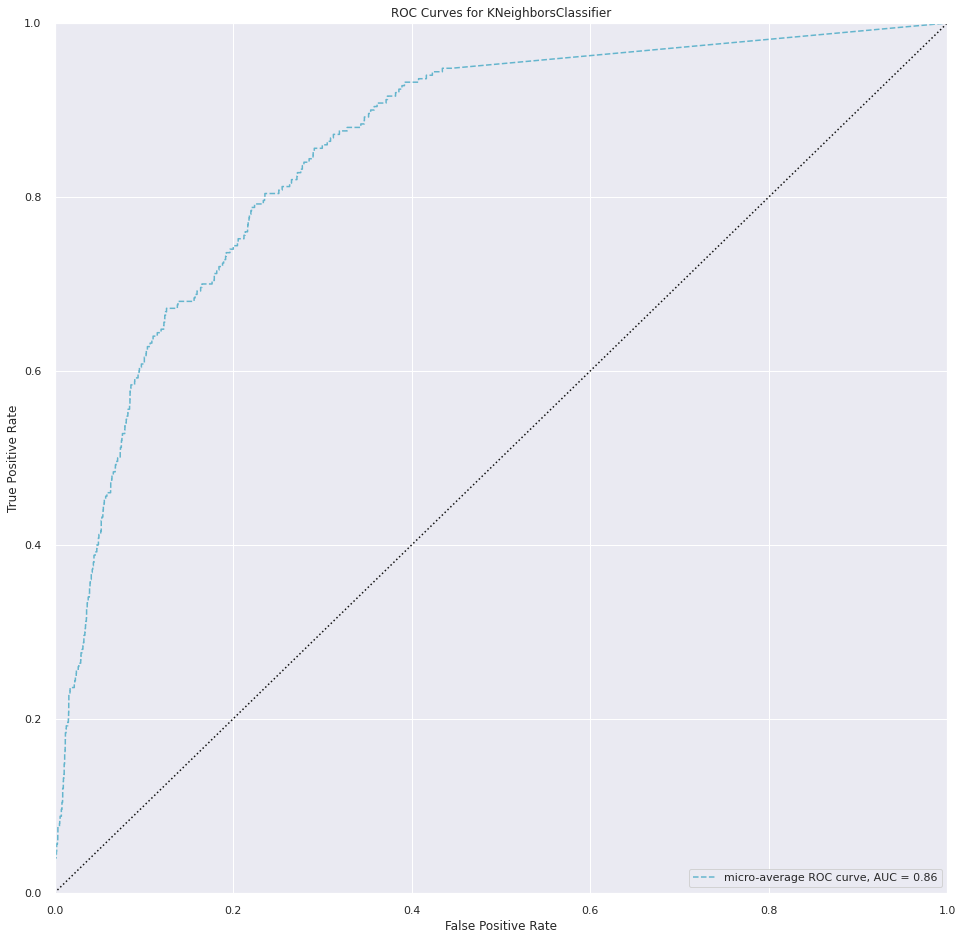

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
# Treina um kNN com os melhores hiperparâmetros encontrados
model = KNeighborsClassifier(n_neighbors=40, weights='distance')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model, micro=False, macro=False, per_class=True, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model, micro=True, macro=False, per_class=False, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## Decision Trees

Best params: {'max_depth': 100, 'max_features': 5, 'min_samples_split': 20}
Best params: {'max_depth': 20, 'max_features': 10, 'min_samples_split': 30}
Best params: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 30}
Best params: {'max_depth': 10, 'max_features': 20, 'min_samples_split': 20}
Best params: {'max_depth': 100, 'max_features': 15, 'min_samples_split': 30}
Best params: {'max_depth': 100, 'max_features': 5, 'min_samples_split': 30}
Best params: {'max_depth': 50, 'max_features': 5, 'min_samples_split': 10}
Best params: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 20}
Best params: {'max_depth': 50, 'max_features': 10, 'min_samples_split': 20}
Best params: {'max_depth': 20, 'max_features': 5, 'min_samples_split': 30}

Precision   : 0.167 +- (0.037)
F1-score    : 0.154 +- (0.031)
Recall      : 0.167 +- (0.037)
Best params : {'max_depth': 20, 'max_features': 5, 'min_samples_split': 30}


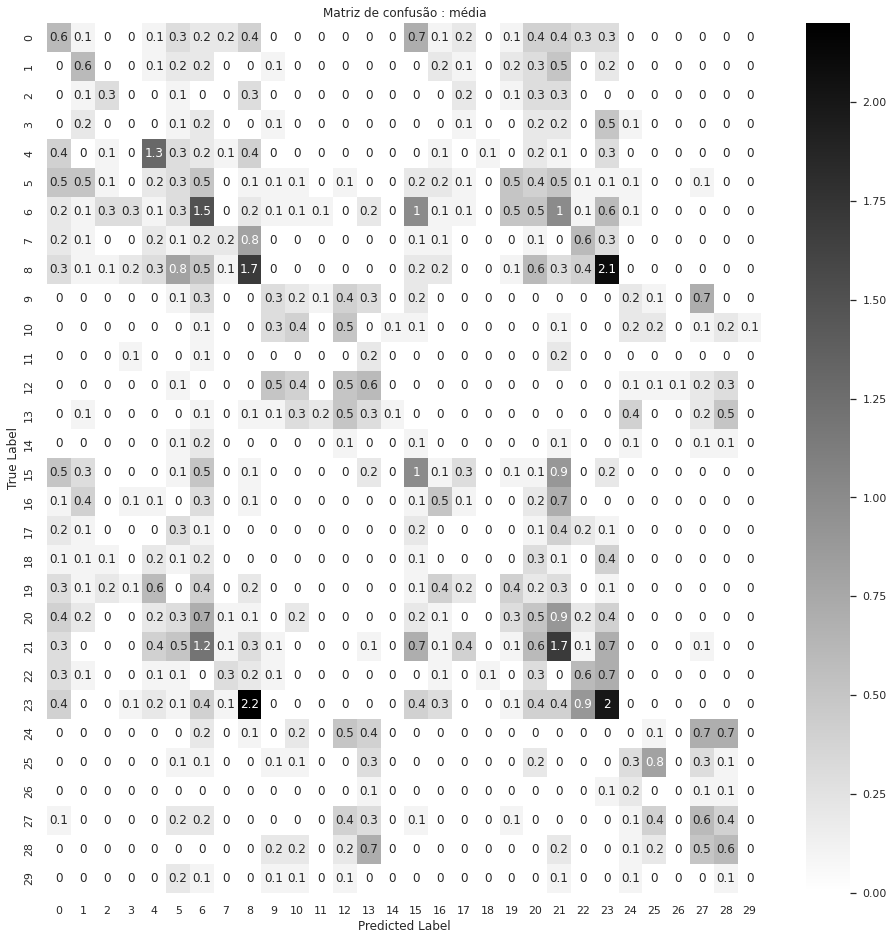

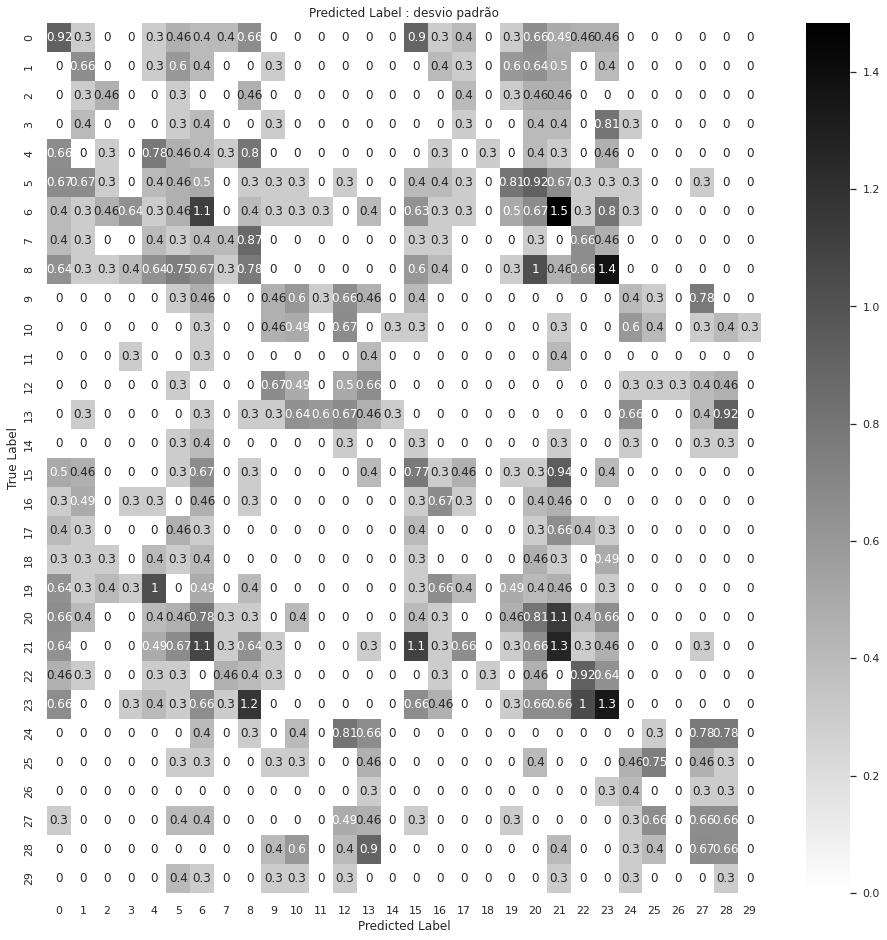

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004834,0.000853,0.002062,0.000581,5,5,10,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.161111,0.150000,0.227778,0.138889,0.094444,0.154444,0.043090,28
1,0.004611,0.000684,0.001673,0.000363,5,5,20,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.138889,0.216667,0.161111,0.122222,0.127778,0.153333,0.034355,32
2,0.005103,0.001157,0.001946,0.000381,5,5,30,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.161111,0.188889,0.155556,0.111111,0.122222,0.147778,0.028021,43
3,0.006996,0.001292,0.001959,0.000372,5,10,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.166667,0.155556,0.133333,0.122222,0.133333,0.142222,0.016330,50
4,0.006813,0.000843,0.003681,0.003198,5,10,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.222222,0.155556,0.155556,0.138889,0.094444,0.153333,0.041066,32
5,0.009238,0.003691,0.002069,0.000748,5,10,30,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.194444,0.194444,0.172222,0.127778,0.138889,0.165556,0.027756,11
6,0.016063,0.006528,0.001748,0.000262,5,15,10,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.150000,0.155556,0.116667,0.116667,0.155556,0.138889,0.018257,52
7,0.010034,0.004182,0.001854,0.000182,5,15,20,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.188889,0.166667,0.166667,0.144444,0.138889,0.161111,0.017916,22
8,0.009022,0.000612,0.001663,0.000193,5,15,30,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.138889,0.172222,0.138889,0.127778,0.150000,0.145556,0.015072,45
9,0.012127,0.003466,0.002084,0.000481,5,20,10,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.138889,0.155556,0.111111,0.105556,0.144444,0.131111,0.019437,58


In [61]:
# cross validation + gridsearch
parameters = {'min_samples_split': [10, 20, 30],
              'max_depth':[5, 10, 20, 50, 100],
              'max_features':[5, 10, 15, 20]
             }
grid_search(StratifiedKFold(n_splits=10, random_state=default_seed, shuffle=True), DecisionTreeClassifier(), parameters, X, y)

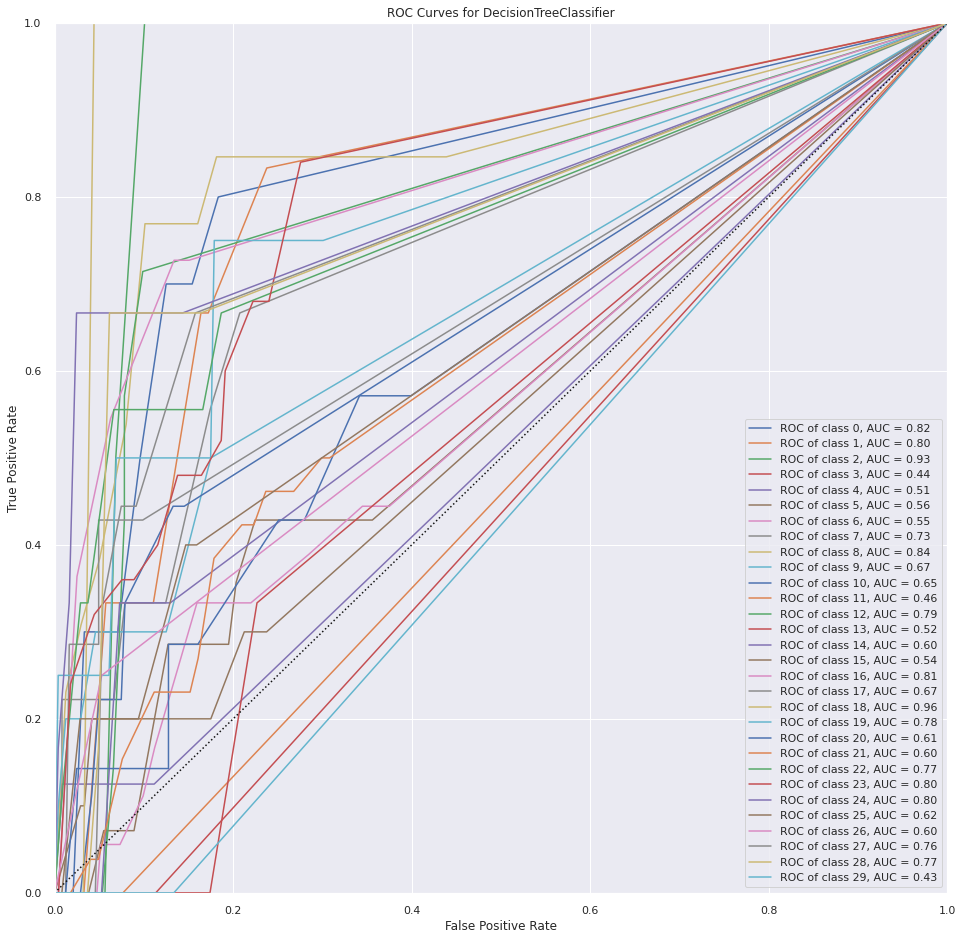

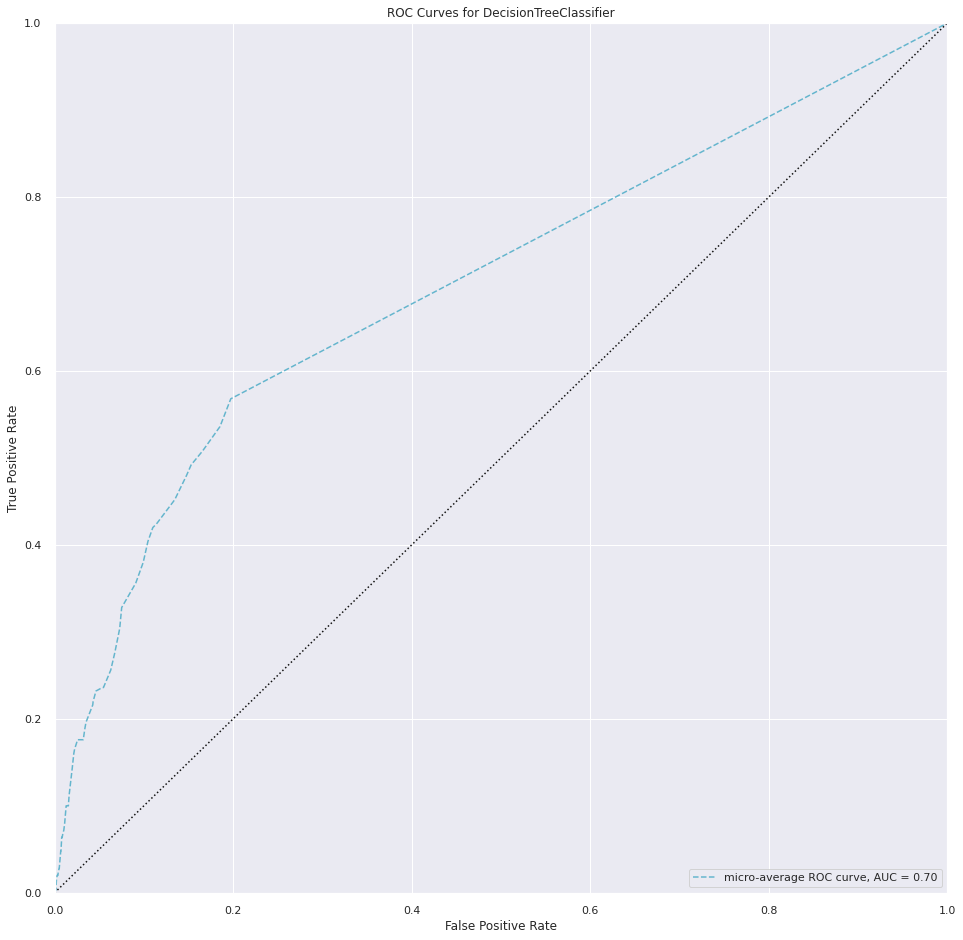

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
# Treina uma DT com os hiperparâmetros encontrados
model_dt = DecisionTreeClassifier(max_depth=50, max_features=5, min_samples_split=20)

model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_dt, micro=False, macro=False, per_class=True, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_dt, micro=True, macro=False, per_class=False, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

### Naïve Bayes

Best params: {'var_smoothing': 0.04328761281083057}
Best params: {'var_smoothing': 0.0023101297000831605}
Best params: {'var_smoothing': 1.0}
Best params: {'var_smoothing': 1.0}
Best params: {'var_smoothing': 1.0}
Best params: {'var_smoothing': 0.01873817422860384}
Best params: {'var_smoothing': 0.04328761281083057}
Best params: {'var_smoothing': 0.1873817422860384}
Best params: {'var_smoothing': 1.0}
Best params: {'var_smoothing': 0.01873817422860384}

Precision   : 0.231 +- (0.035)
F1-score    : 0.197 +- (0.030)
Recall      : 0.231 +- (0.035)
Best params : {'var_smoothing': 0.01873817422860384}


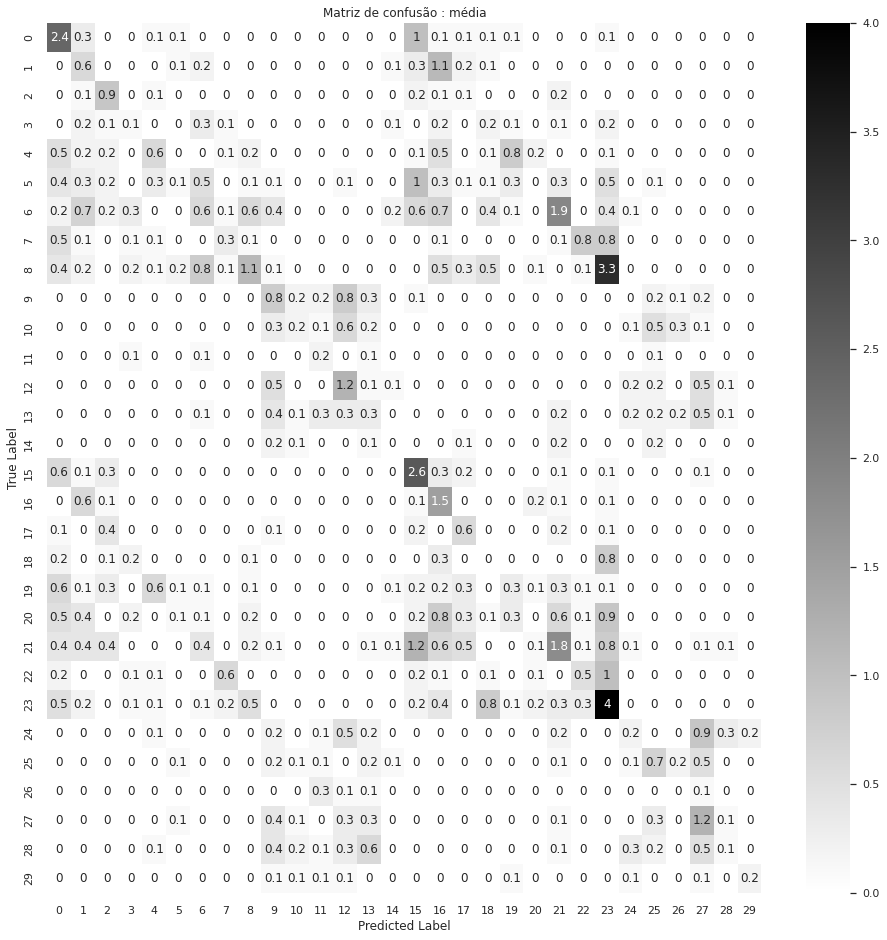

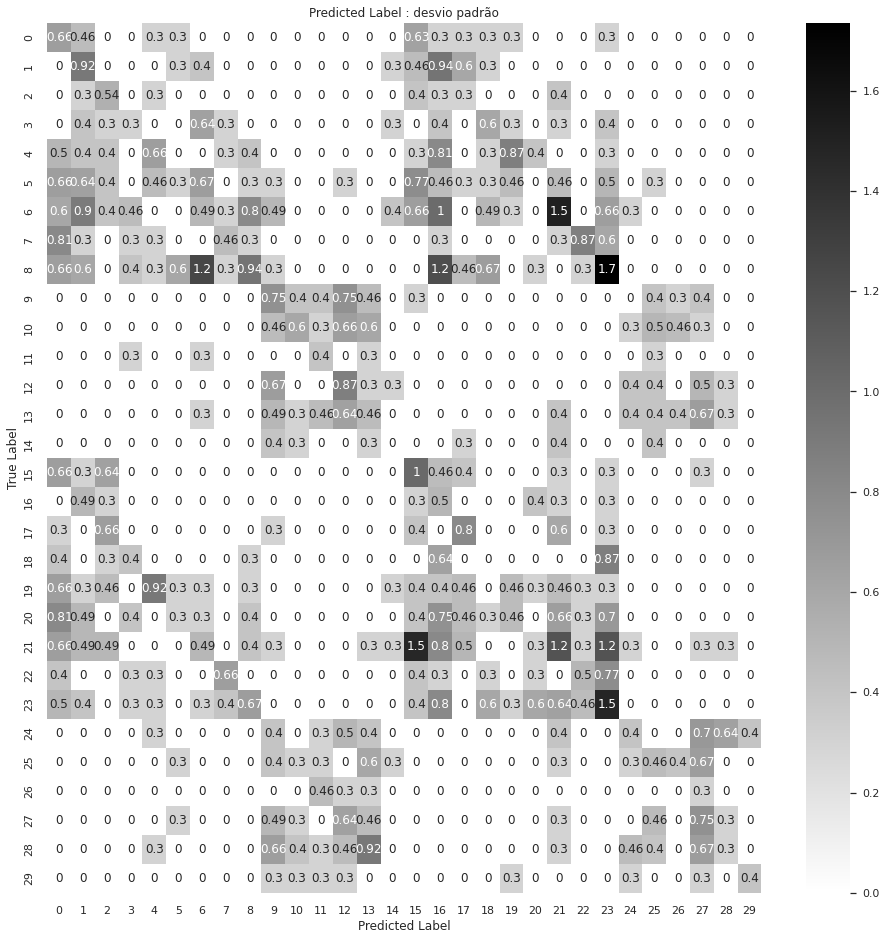

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004894,0.000120,0.002988,0.000233,1.0,{'var_smoothing': 1.0},0.238889,0.238889,0.227778,0.138889,0.211111,0.211111,0.037515,91
1,0.004684,0.000754,0.003382,0.000411,0.811131,{'var_smoothing': 0.8111308307896871},0.238889,0.222222,0.216667,0.138889,0.211111,0.205556,0.034605,99
2,0.005447,0.001294,0.003162,0.000541,0.657933,{'var_smoothing': 0.657933224657568},0.255556,0.222222,0.216667,0.138889,0.205556,0.207778,0.038265,97
3,0.005031,0.000373,0.003725,0.000700,0.53367,{'var_smoothing': 0.533669923120631},0.250000,0.216667,0.227778,0.133333,0.200000,0.205556,0.039597,99
4,0.005230,0.001182,0.003773,0.000675,0.432876,{'var_smoothing': 0.43287612810830584},0.261111,0.227778,0.244444,0.138889,0.205556,0.215556,0.042514,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004103,0.000951,0.003058,0.001201,0.0,{'var_smoothing': 2.310129700083158e-09},0.266667,0.255556,0.255556,0.116667,0.194444,0.217778,0.056590,3
96,0.004115,0.000608,0.003227,0.000496,0.0,{'var_smoothing': 1.873817422860387e-09},0.266667,0.255556,0.255556,0.116667,0.194444,0.217778,0.056590,3
97,0.003983,0.000100,0.003042,0.000370,0.0,{'var_smoothing': 1.519911082952933e-09},0.266667,0.255556,0.255556,0.116667,0.194444,0.217778,0.056590,3
98,0.003461,0.000626,0.002326,0.000486,0.0,{'var_smoothing': 1.2328467394420635e-09},0.266667,0.255556,0.255556,0.116667,0.194444,0.217778,0.056590,3


In [65]:
# cross validation + gridsearch
parameters = { 'var_smoothing' : np.logspace(0,-9, num=100) }
grid_search(StratifiedKFold(n_splits=10, random_state=default_seed, shuffle=True), GaussianNB(), parameters, X, y)

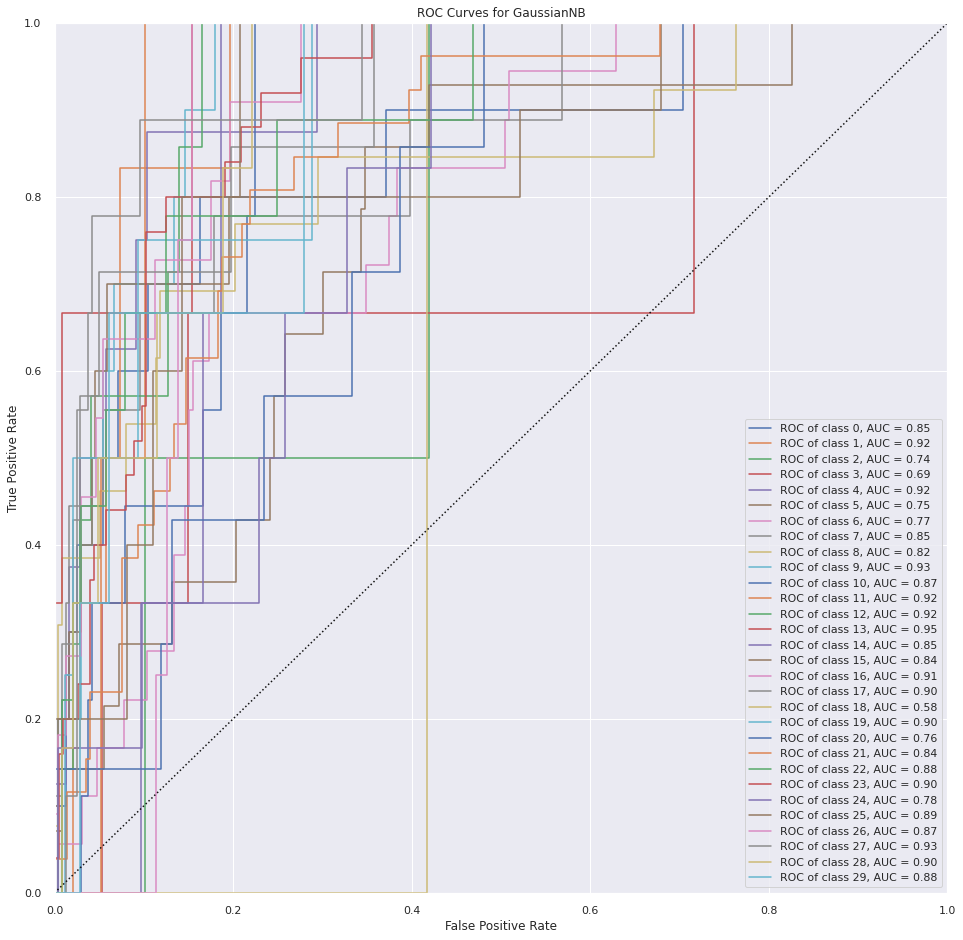

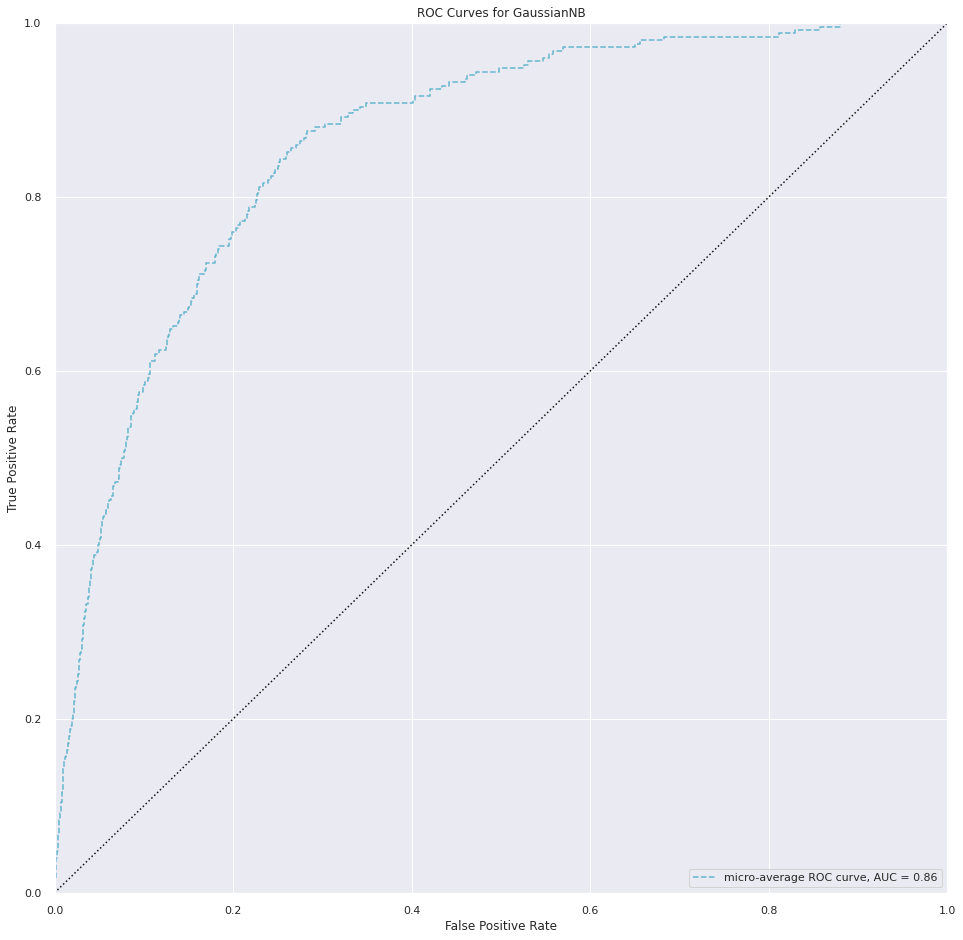

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [21]:
# Treina um classificador Naïve Bayes com os hiperparâmetros encontrados
model_nb = GaussianNB(var_smoothing = 0.01873817422860384)

model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_nb, micro=False, macro=False, per_class=True, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_nb, micro=True, macro=False, per_class=False, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## MLP Multi Layer Perceptron

/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Con

Best params: {'activation': 'relu', 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'solver': 'adam'}


/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    

Best params: {'activation': 'relu', 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'adam'}


/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/tjunior/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

Best params: {'activation': 'logistic', 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'adam'}

Precision   : 0.263 +- (0.017)
F1-score    : 0.247 +- (0.025)
Recall      : 0.263 +- (0.017)
Best params : {'activation': 'logistic', 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'adam'}


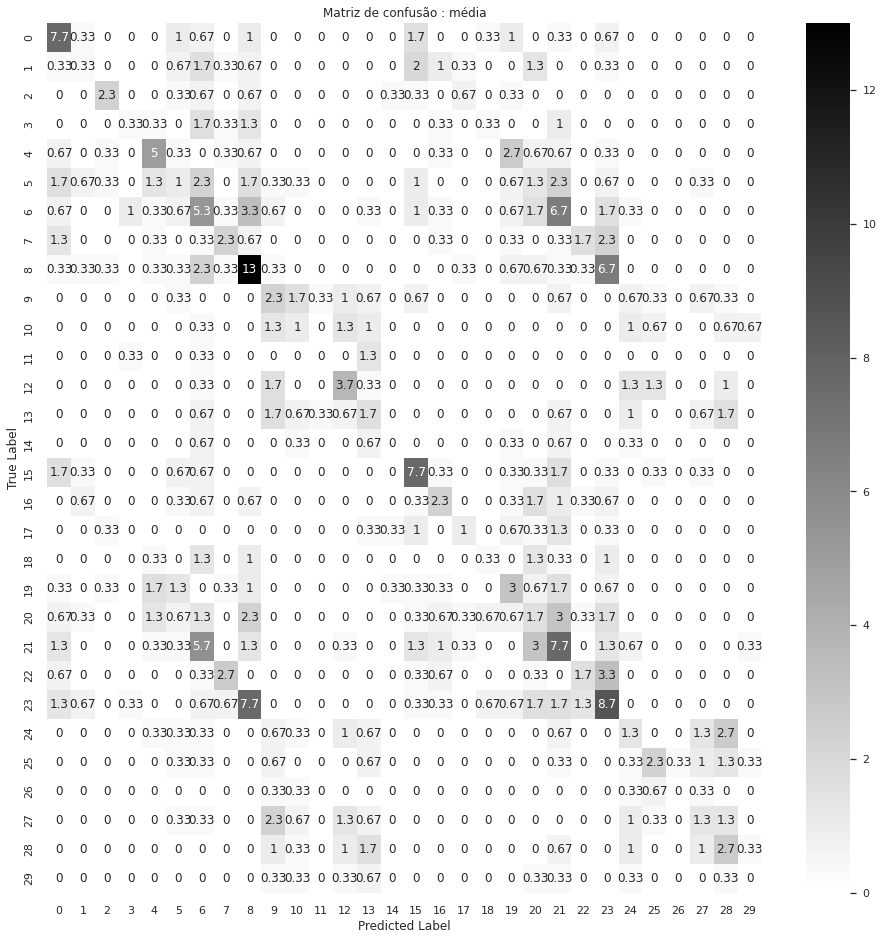

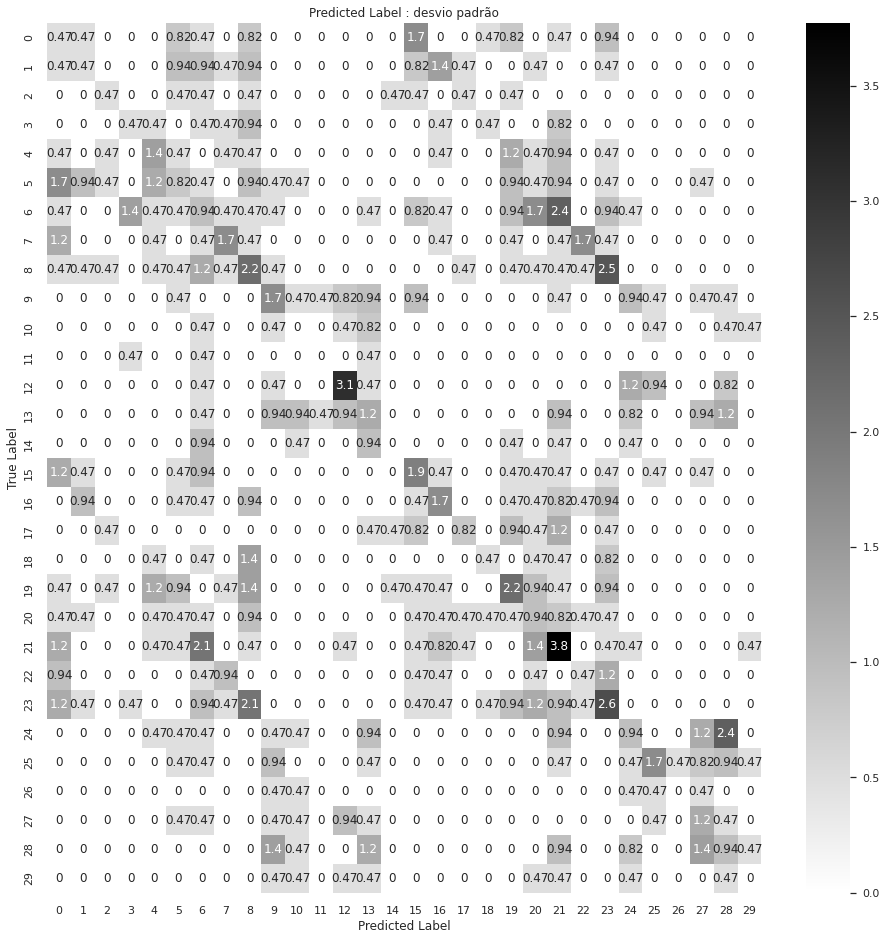

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.603982,0.223881,0.003551,0.001395,identity,150,constant,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.261194,0.216418,0.263158,0.172932,0.240602,0.230861,0.033533,42
1,2.505803,0.281942,0.002896,0.000233,identity,150,constant,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.119403,0.134328,0.157895,0.172932,0.120301,0.140972,0.021187,76
2,2.428904,0.230206,0.004297,0.001315,identity,150,constant,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.298507,0.216418,0.300752,0.187970,0.210526,0.242835,0.047341,31
3,2.469071,0.375470,0.003105,0.000459,identity,150,invscaling,lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",0.261194,0.216418,0.270677,0.172932,0.240602,0.232364,0.035081,39
4,0.126759,0.013592,0.003141,0.000497,identity,150,invscaling,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.037313,0.067164,0.007519,0.060150,0.060150,0.046459,0.021925,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.250379,0.016599,0.004720,0.000576,relu,300,invscaling,sgd,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.037313,0.029851,0.022556,0.007519,0.052632,0.029974,0.015010,107
104,6.738319,0.128596,0.004261,0.000564,relu,300,invscaling,adam,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.305970,0.201493,0.248120,0.195489,0.240602,0.238335,0.039670,36
105,4.252634,0.325986,0.003866,0.000397,relu,300,adaptive,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.231343,0.231343,0.218045,0.172932,0.165414,0.203816,0.028798,53
106,5.854706,0.185970,0.003798,0.001846,relu,300,adaptive,sgd,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.089552,0.126866,0.112782,0.142857,0.120301,0.118472,0.017534,88


In [17]:
# cross validation + gridsearch
parameters = { 'hidden_layer_sizes' : [150, 200, 300],
               'activation' : ['identity', 'logistic', 'tanh', 'relu'],
               'solver' : ['lbfgs', 'sgd', 'adam'],
               'learning_rate' : ['constant', 'invscaling', 'adaptive'] }

grid_search(StratifiedKFold(n_splits=3, random_state=default_seed, shuffle=True), MLPClassifier(max_iter=500), parameters, X, y)

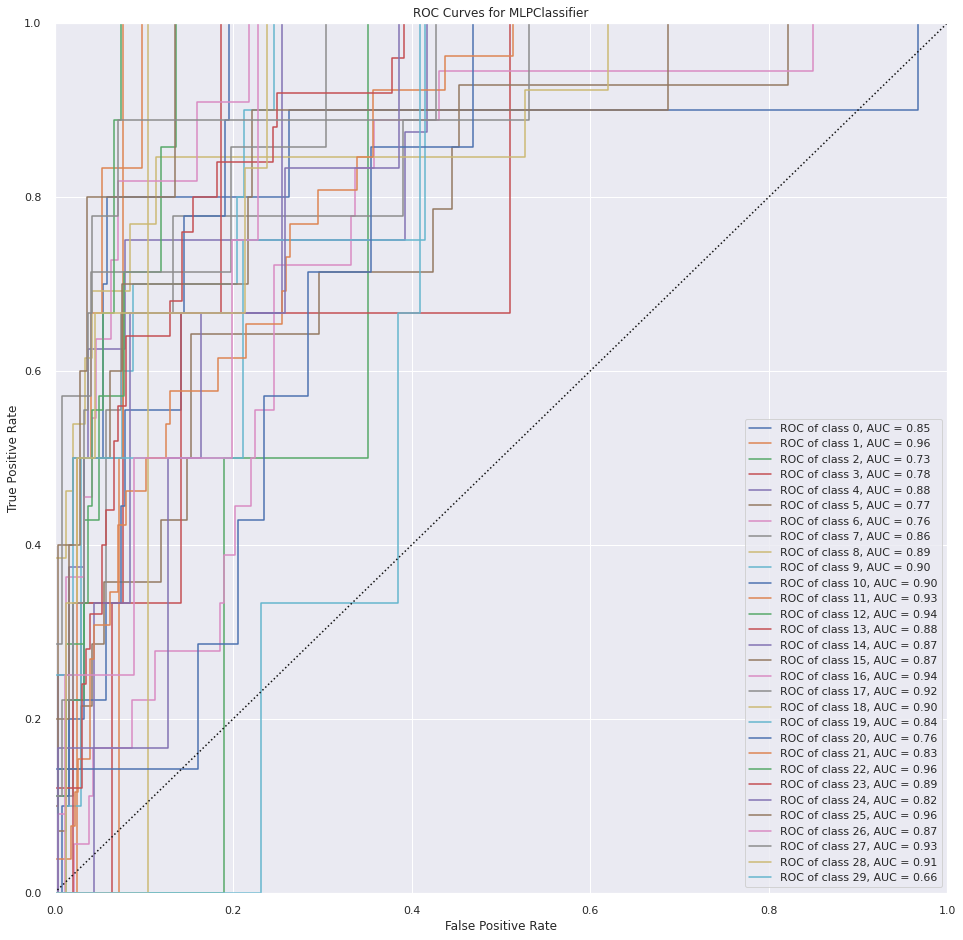

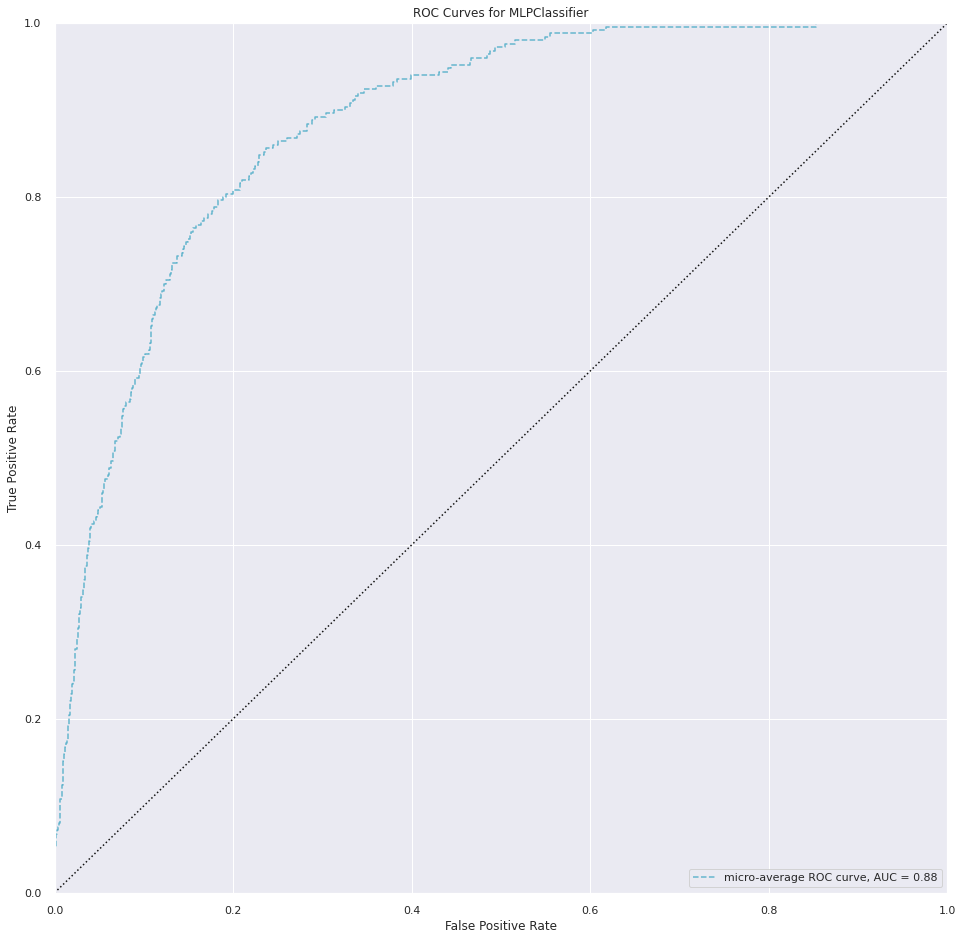

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
# Treina um classificador Naïve Bayes com os hiperparâmetros encontrados
model_mlp = MLPClassifier(activation='relu', hidden_layer_sizes=150, learning_rate='invscaling', solver='adam', max_iter=500)

model_mlp.fit(X_train, y_train)
y_pred = model_mlp.predict(X_test)

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_mlp, micro=False, macro=False, per_class=True, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_mlp, micro=True, macro=False, per_class=False, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## SVM Support vector machines

Best params: {'C': 10, 'kernel': 'rbf'}
Best params: {'C': 2, 'kernel': 'rbf'}
Best params: {'C': 2, 'kernel': 'rbf'}
Best params: {'C': 3, 'kernel': 'rbf'}
Best params: {'C': 1, 'kernel': 'rbf'}
Best params: {'C': 5, 'kernel': 'linear'}
Best params: {'C': 3, 'kernel': 'rbf'}
Best params: {'C': 3, 'kernel': 'rbf'}
Best params: {'C': 3, 'kernel': 'rbf'}
Best params: {'C': 3, 'kernel': 'rbf'}

Precision   : 0.279 +- (0.037)
F1-score    : 0.253 +- (0.033)
Recall      : 0.279 +- (0.037)
Best params : {'C': 3, 'kernel': 'rbf'}


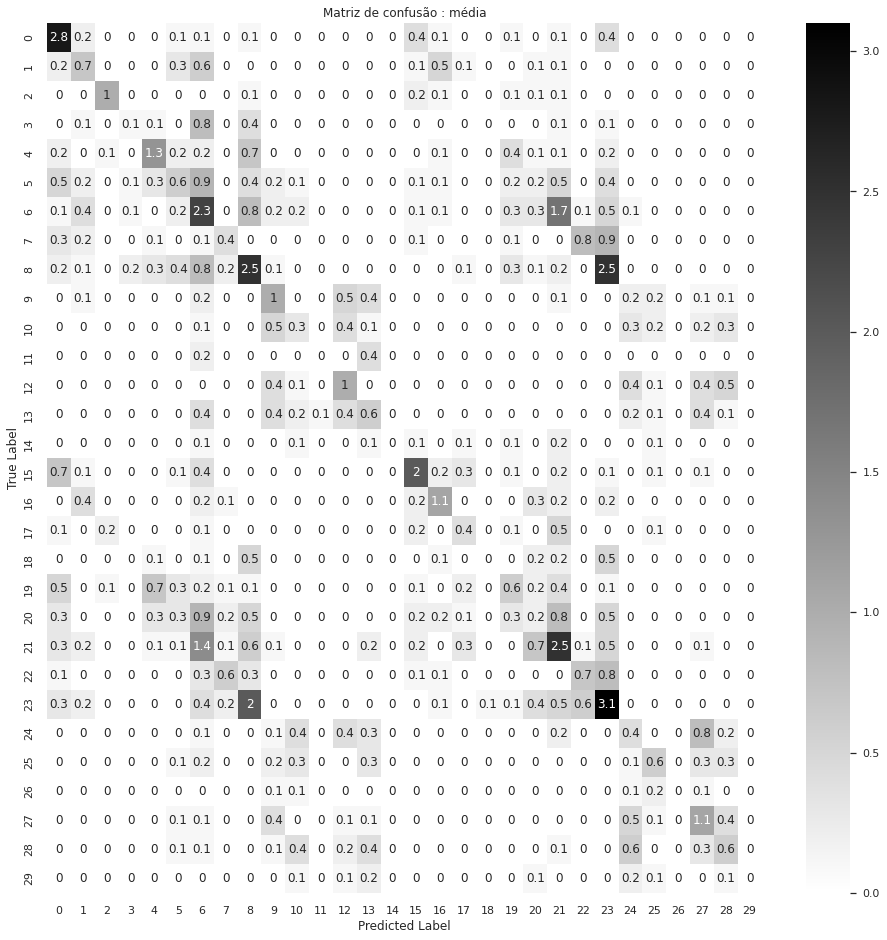

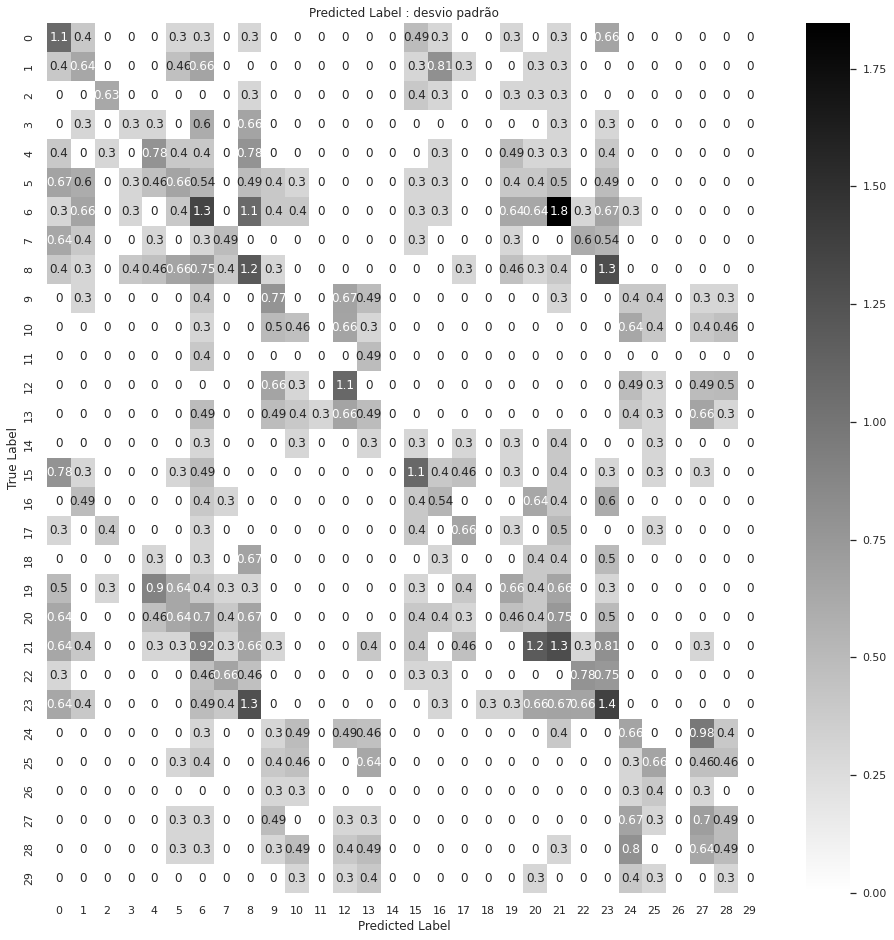

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040884,0.005237,0.012390,0.001319,1,linear,"{'C': 1, 'kernel': 'linear'}",0.277778,0.244444,0.277778,0.216667,0.205556,0.244444,0.030021,12
1,0.061187,0.004752,0.017922,0.001878,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.305556,0.266667,0.338889,0.216667,0.222222,0.270000,0.047219,3
2,0.045772,0.007003,0.011398,0.001825,2,linear,"{'C': 2, 'kernel': 'linear'}",0.327778,0.238889,0.288889,0.227778,0.250000,0.266667,0.036851,5
3,0.067040,0.018239,0.016430,0.000815,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.338889,0.244444,0.316667,0.227778,0.227778,0.271111,0.047193,2
4,0.049083,0.008682,0.014866,0.002618,3,linear,"{'C': 3, 'kernel': 'linear'}",0.311111,0.261111,0.288889,0.216667,0.216667,0.258889,0.037941,8
5,0.062267,0.012350,0.016757,0.001491,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.355556,0.277778,0.300000,0.211111,0.233333,0.275556,0.050869,1
6,0.043578,0.003726,0.013643,0.002899,4,linear,"{'C': 4, 'kernel': 'linear'}",0.288889,0.272222,0.294444,0.211111,0.222222,0.257778,0.034534,9
7,0.068945,0.013429,0.017547,0.001491,4,rbf,"{'C': 4, 'kernel': 'rbf'}",0.322222,0.244444,0.305556,0.233333,0.227778,0.266667,0.039284,4
8,0.055260,0.013423,0.013996,0.002763,5,linear,"{'C': 5, 'kernel': 'linear'}",0.294444,0.266667,0.294444,0.211111,0.233333,0.260000,0.033222,7
9,0.075379,0.007911,0.021516,0.004785,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.322222,0.238889,0.266667,0.216667,0.222222,0.253333,0.038586,10


In [19]:
# cross validation + gridsearch
# parameters = { 'hidden_layer_sizes' : [50, 100, 150],
#                'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#                'solver' : ['lbfgs', 'sgd', 'adam'],
#                'learning_rate' : ['constant', 'invscaling', 'adaptive'] }
model = SVC()
parameters = {'C':[1, 2, 3, 4, 5, 10, 50, 100, 150, 1000],
                'kernel': ['linear', 'rbf']}
grid_search(StratifiedKFold(n_splits=10, random_state=default_seed, shuffle=True), SVC(), parameters, X, y)

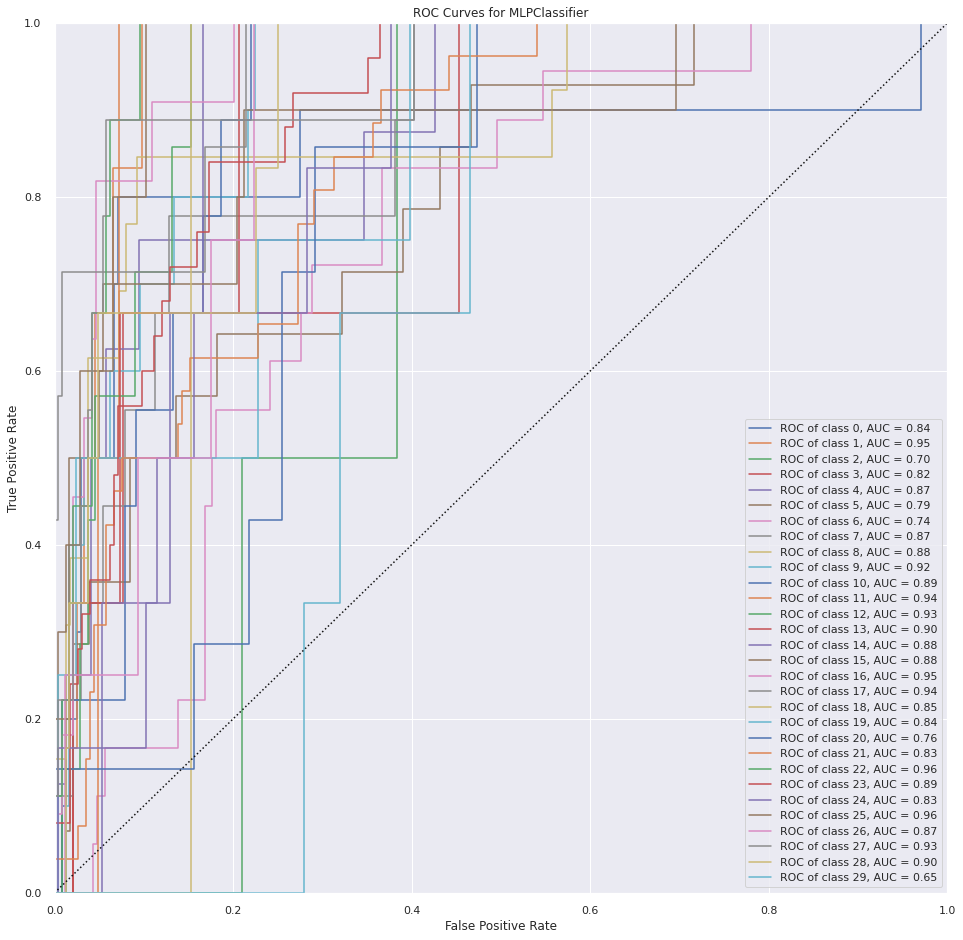

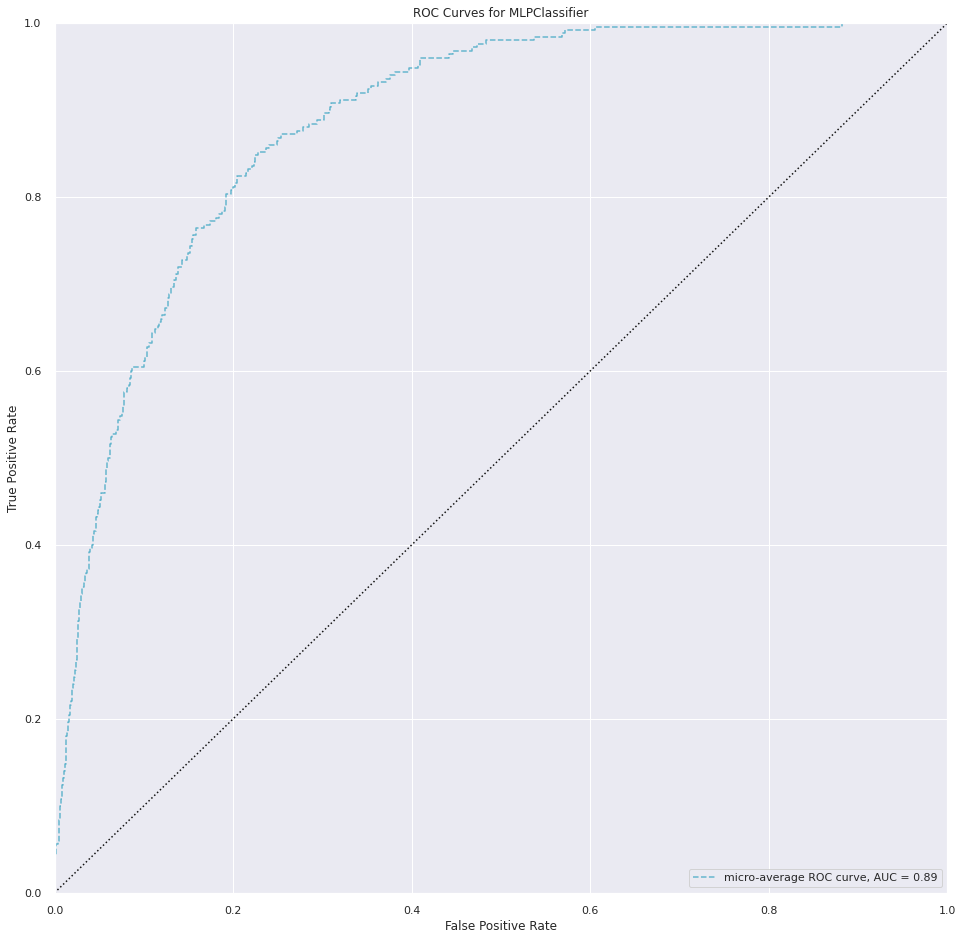

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [20]:
# Treina um classificador Naïve Bayes com os hiperparâmetros encontrados
model_svm = MLPClassifier(activation='relu', hidden_layer_sizes=150, learning_rate='invscaling', solver='adam', max_iter=500)

model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_svm, micro=False, macro=False, per_class=True, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_svm, micro=True, macro=False, per_class=False, is_fitted=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 